In [45]:
import sys
sys.path.append('..')

from soundfile import SoundFile
import librosa
from librosa import display
from librosa import amplitude_to_db, power_to_db
from sklearn.utils import resample, shuffle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm


In [46]:
def plot_mfcc(file_name):
    with SoundFile(file_name) as sound_file:
        audio = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate

        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

        display.specshow(mfccs, x_axis='time')
        plt.colorbar()
        plt.tight_layout()
        plt.title('MFCC')

        plt.show()

def plot_mel(file_name):
    with SoundFile(file_name) as sound_file:
        audio = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate

        fig, ax = plt.subplots()
        M = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
        M_db = librosa.power_to_db(M, ref=np.max)
        img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
        ax.set(title='Mel Spectrogram')
        fig.colorbar(img, ax=ax, format="%+2.f dB")

def plot_chroma(file_name):
    with SoundFile(file_name) as sound_file:
        audio = sound_file.read(dtype="float32")
        stft = np.abs(librosa.stft(audio))
        sample_rate = sound_file.samplerate

        fig, ax = plt.subplots()
        chromagram_stft = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
        img = librosa.display.specshow(chromagram_stft, y_axis='chroma', x_axis='time', ax=ax)
        ax.set(title='Chroma STFT')

def plot_rmse(file_name):
    with SoundFile(file_name) as sound_file:
        audio = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate

        # rms = librosa.feature.rms(y=audio)
        # fig, ax = plt.subplots()
        # times = librosa.times_like(rms)
        # ax.semilogy(times, rms[0], label='RMS Energy')
        # ax.set(xticks=[])
        # ax.legend()
        # ax.label_outer()

        rms = librosa.feature.rms(y=audio)[0]
        frames = range(len(rms))
        t = librosa.frames_to_time(frames)

        plt.figure()
        librosa.display.waveshow(audio, alpha=0.5)
        plt.plot(t, rms, color="r")
        plt.ylim((-0.5, 0.5))
        plt.title("RMS Energy")

def plot_zcr(file_name):
    with SoundFile(file_name) as sound_file:
        audio = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        zcr = librosa.feature.zero_crossing_rate(y=audio)[0]

        t = librosa.frames_to_time(range(len(zcr)))
        plt.figure()
        librosa.display.waveshow(audio, alpha=0.5)
        plt.plot(t, zcr)
        plt.ylim(-0.5, 0.5)
        plt.title("Zero Crossing Rate")
        plt.show()

def plot_contrast(file_name):
    with SoundFile(file_name) as sound_file:
        audio = sound_file.read(dtype="float32")
        stft = np.abs(librosa.stft(audio))
        sample_rate = sound_file.samplerate
        contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)

        fig, ax = plt.subplots()
        img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax)
        fig.colorbar(img2, ax=[ax])
        ax.set(ylabel='Frequency bands', title='Spectral contrast')

# MFCC

['hap', 'sad']


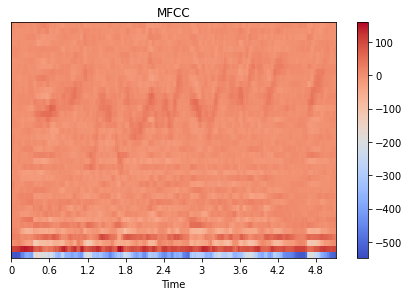

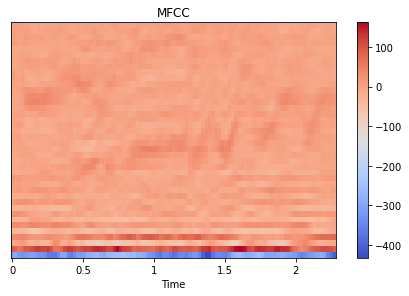

In [47]:
df = pd.read_csv('../iemocap_metadata.csv')
df.loc[(df['emotion'] == 'exc'), 'emotion'] = 'hap'
df.drop(df.loc[(df['emotion'] == 'xxx') | (df['emotion'] == 'dis') | (df['emotion'] == 'oth') | (df['emotion'] == 'fea') | (df['emotion'] == 'sur') | (df['emotion'] == 'fru')].index, inplace = True)

df = shuffle(df, random_state=42)

file_list = df['path'].tolist()
emotions = df['emotion'].tolist()

print(emotions[1:3])

for index, file_name in enumerate(file_list[1:3]):
    plot_mfcc('../data/IEMOCAP_dataset/' + file_name)

# Mel Spectrogram

['hap', 'sad']


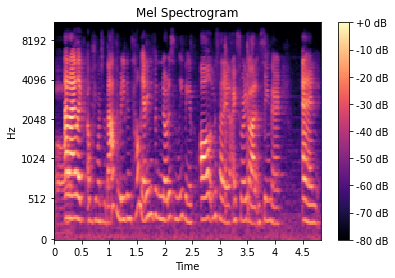

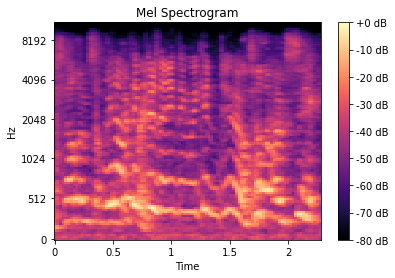

In [48]:
print(emotions[1:3])

for index, file_name in enumerate(file_list[1:3]):
    plot_mel('../data/IEMOCAP_dataset_trimmed/' + file_name)

# Chroma

['hap', 'sad']


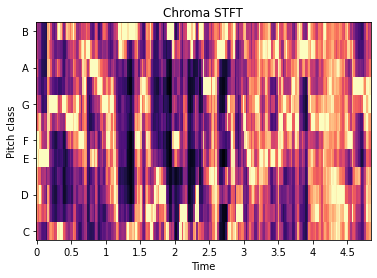

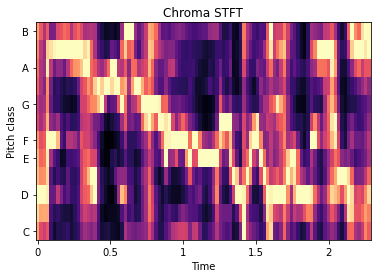

In [49]:
print(emotions[1:3])

for index, file_name in enumerate(file_list[1:3]):
    plot_chroma('../data/IEMOCAP_dataset_trimmed/' + file_name)

# RMSE

['hap', 'sad']


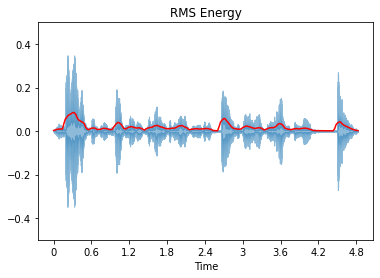

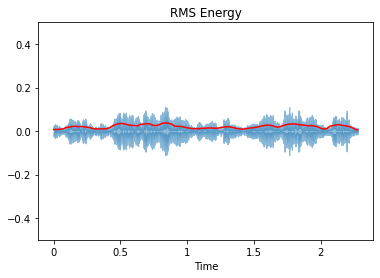

In [50]:
print(emotions[1:3])

for index, file_name in enumerate(file_list[1:3]):
    plot_rmse('../data/IEMOCAP_dataset_trimmed/' + file_name)

# ZCR

['hap', 'sad']


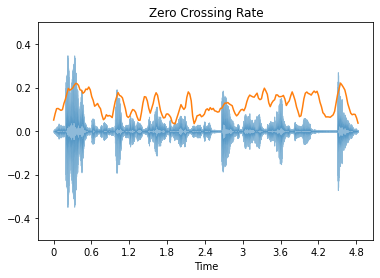

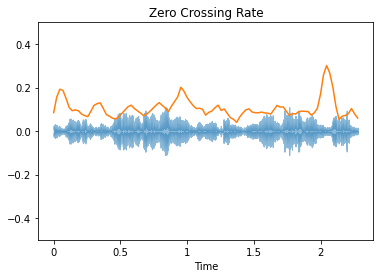

In [51]:
print(emotions[1:3])

for index, file_name in enumerate(file_list[1:3]):
    plot_zcr('../data/IEMOCAP_dataset_trimmed/' + file_name)

# Spectral Contrast

['hap', 'sad']


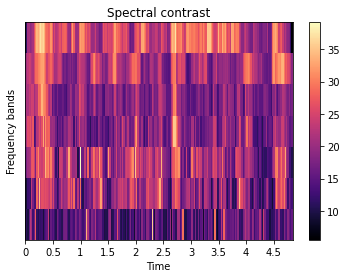

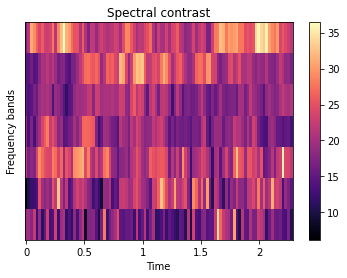

In [52]:
print(emotions[1:3])

for index, file_name in enumerate(file_list[1:3]):
    plot_contrast('../data/IEMOCAP_dataset_trimmed/' + file_name)